In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

import torch
import torch.nn as nn
import torch.optim as optim
import random

import torchvision
import torchvision.utils
from torchvision.models import detection
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

import dataset as data
import utils as utils
import pickle
import attackMethods as am

print(torch.__version__)
print(torch.cuda_version)
print(torchvision.__version__)

1.10.0+cu113
11.3
0.11.1+cu113


In [2]:
device = torch.device("cpu")

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model = model.float().to(device)

dataset = data.AdversarialDataset() # todo: use resize to pull picture in batch

loss = am.lossObjectness

patch = utils.LoadPatch("patch 40%")

In [5]:
patch = am.generatePatch()

In [8]:
image, label = dataset[80000]
utils.testPatch(patch, image, label, model, device, loss, 0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


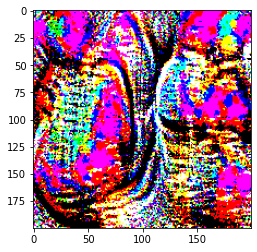

In [3]:
utils.ShowPatch(patch.cpu())

sh script (path dataset, patch size, )